In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.16.1


## Prepare Dataset

In [3]:
train_df_path ='../07. Pemodelan Data (Data Mining)/dataset/Dataset_final.csv'


In [4]:
train_df = pd.read_csv(train_df_path, sep=',', header=None, usecols=[2,3], skiprows=1)

train_df.columns = ['full_text', 'emotion']

In [5]:
train_df.head(10)

,full_text,emotion
0,pengabdian terpuji meskipun terlihat biasa,Neutral
1,baru mengirim foto,Neutral
2,apa kabar dunia twitter masihkah selucu seabsu...,Neutral
3,yah gimana sih yaudah susul sebelumnya sarapan...,Neutral
4,ka dorg suro beli medium set,Neutral
5,ayo cek koleksinya temukan angry draken unik n...,Neutral
6,kalau biasa biasa sudah,Neutral
7,tiap tiap twit tak selalu perlu pesan moral ka...,Neutral
8,halo v apa kabar nih,Neutral
9,pagi ruby apa kabar,Neutral


In [6]:
def get_label_idx(label):
    if label == 'Fear':
        return 5
    elif label == 'Sad':
        return 4
    elif label == 'Love':
        return 3
    elif label == 'Joy':
        return 2
    elif label == 'Anger':
        return 1
    elif label == 'Neutral':
        return 0


train_df['emotion'] = train_df['emotion'].apply(get_label_idx)


In [7]:
#hapus label selain 0-5
train_df = train_df[train_df['emotion'] <= 5]


In [8]:
train_df

,full_text,emotion
0,pengabdian terpuji meskipun terlihat biasa,0
1,baru mengirim foto,0
2,apa kabar dunia twitter masihkah selucu seabsu...,0
3,yah gimana sih yaudah susul sebelumnya sarapan...,0
4,ka dorg suro beli medium set,0
...,...,...
57028,cod beli euphoria wonderland la foret fairy ha...,2
57029,ลองด cod flash sale ก โล แมคคายกกระสอบ ต กก ต ...,2
57030,wal cod an shopee kawa pakai qris lah yuu,0
57031,temukan bisa cod light stick treasure bluetoot...,0


# Define the function to join the list of tokens as a single document string
def join_text_list(texts):
    try:
        texts = ast.literal_eval(texts)
        return ' '.join([text for text in texts])
    except (ValueError, SyntaxError):
        return None  # or return an empty string if you prefer

# Apply the function to the 'full_text' column
train_df["full_text"] = train_df["full_text"].apply(join_text_list)

# Display the first few rows of the preprocessed column
train_df

In [9]:
jumlah_netral = len(train_df[train_df['emotion'] == 0])
jumlah_marah = len(train_df[train_df['emotion'] == 1])
jumlah_senang = len(train_df[train_df['emotion'] == 2])
jumlah_cinta = len(train_df[train_df['emotion'] == 3])
jumlah_sedih = len(train_df[train_df['emotion'] == 4])
jumlah_takut = len(train_df[train_df['emotion'] == 5])

print("Jumlah Netral: ", jumlah_netral)
print("Jumlah Marah: ", jumlah_marah)
print("Jumlah Senang: ", jumlah_senang)
print("Jumlah Cinta: ", jumlah_cinta)
print("Jumlah Sedih: ", jumlah_sedih)
print("Jumlah Takut: ", jumlah_takut)

Jumlah Netral:  12984
Jumlah Marah:  11069
Jumlah Senang:  12312
Jumlah Cinta:  5396
Jumlah Sedih:  7275
Jumlah Takut:  7997


In [10]:
# Split dataset menjadi fitur (X) dan label (y)
X_train = train_df['full_text']
y_train = train_df['emotion']


In [11]:
##split dataset
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [12]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((51329,), (5704,), (51329,), (5704,))

## Generate Padded Sequence

In [13]:
# Parameters

vocab_size = 60000 
max_length = 50 
embedding_dim = 8 
trunc_type='post' 
oov_tok = "<OOV>" 

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import re

# Define the "all_texts" variable
X_train = [str(text) for text in X_train]
X_valid = [str(text) for text in X_valid]

# Tokenisasi
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Gabungkan semua teks untuk membuat kamus indeks kata
all_texts = list(X_train) + list(X_valid)

# Membuat kamus indeks kata
tokenizer.fit_on_texts(all_texts)
word_index = tokenizer.word_index
word_index


# Konversi kalimat menjadi urutan kata
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type, padding="post")

valid_sequences = tokenizer.texts_to_sequences(X_valid)
valid_padded = pad_sequences(valid_sequences, maxlen=max_length, truncating=trunc_type, padding="post")




In [15]:
X_train

['media hadapan dewan keamanan buta tuli tak punya nurani menlu retno marsudi menyampaikan gunakan kekuatan besar untuk menjadi lebih manusiawi rakyat palestina berhak mendapatkan hak perlakuan sama semua umat manusia',
 'film yang bikin bolak balik bioskop x liat hugh jackman nyanyi nari dong abis nonton film feels good rasanya',
 'min facebook di ambil orang saya tahu siapa ambil alih nya mohon pencerahhan nya',
 'i disagree that you say iran and hamas etc do not speak about islam and do not use their faith to justify their actions they would not exist without islam also most americans do not support israel because of bible',
 'keinget sebelumnya ngejar pak sampai annex belain toefl jakarta persiapan samsek ngirim hasil toefl bandung ngumpulin berkas itu lain lain',
 'jamin deh gemana pak police siap kerja pungli sejenisnya korup pungli bagai addicted sekali coba keenakan tambah deh',
 'jadi ngerti waktu kepilih buat tes mental tertawa takut saya makin down mentalnya selama kuliah ka

In [16]:
y_train

38018    4
13251    2
28075    4
52169    1
16510    4
        ..
54343    5
38158    5
860      0
15795    4
56422    0
Name: emotion, Length: 51329, dtype: int64

### kamus data untuk api Training

In [17]:
# import pickle

# Simpan tokenizer ke dalam file
# with open('tokenizer-2classes-no-stemming.pickle', 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [18]:
print(train_padded[0])

[  431  4178  1664  1131  1562  6959    49    66  3666  7311  7683 14774
  1213  1088   887   159   261    73    25  6329    65    19  1935   703
   502  6034     6    39   629   281     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0]


## Word Embedding

In [19]:
from gensim.models import Word2Vec

# Gabungkan data pelatihan dan validasi
sentences = [sentence.split() for sentence in X_train] + [sentence.split() for sentence in X_valid]

# Latih model Word2Vec
w2v_model = Word2Vec(sentences, vector_size=8, window=5, min_count=1, workers=4)

In [20]:
# Create a weight matrix for the embedding layer
embedding_matrix = np.zeros((vocab_size, 8))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
        

In [21]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-3.38487792, -1.18604732, -0.03506846, ..., -2.73346567,
         1.28653741,  2.59507465],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [22]:
# Mencari kata berdasarkan vektor tertentu
def find_word_by_vector(embedding_matrix, vector):
    for word, index in word_index.items():
        if np.array_equal(embedding_matrix[index], vector):
            return word, embedding_matrix[index]
    return None

# Contoh: Mencari kata untuk vektor embedding_matrix[3]
word = find_word_by_vector(embedding_matrix, embedding_matrix[345])
print(word)

('pulang', array([-2.90285325, -0.64425516,  1.85421276,  0.59157723,  6.98295736,
        0.34166247,  0.68639678, -2.57484818]))


## Build and Compile Model

In [23]:
# convert to bi-lstm model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 8,  embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix), input_shape=(max_length,), trainable=False),
    # tf.keras.layers.Embedding(vocab_size, 8, input_shape=(max_length,)),
    tf.keras.layers.Conv1D(128, 5, activation='relu', padding='same'),
    # tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 50, 8)          │       480,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 50, 128)        │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        51,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,566 (2.05 MB)

 Trainable params: 56,566 (220.96 KB)

 Non-trainable params: 480,000 (1.83 MB)

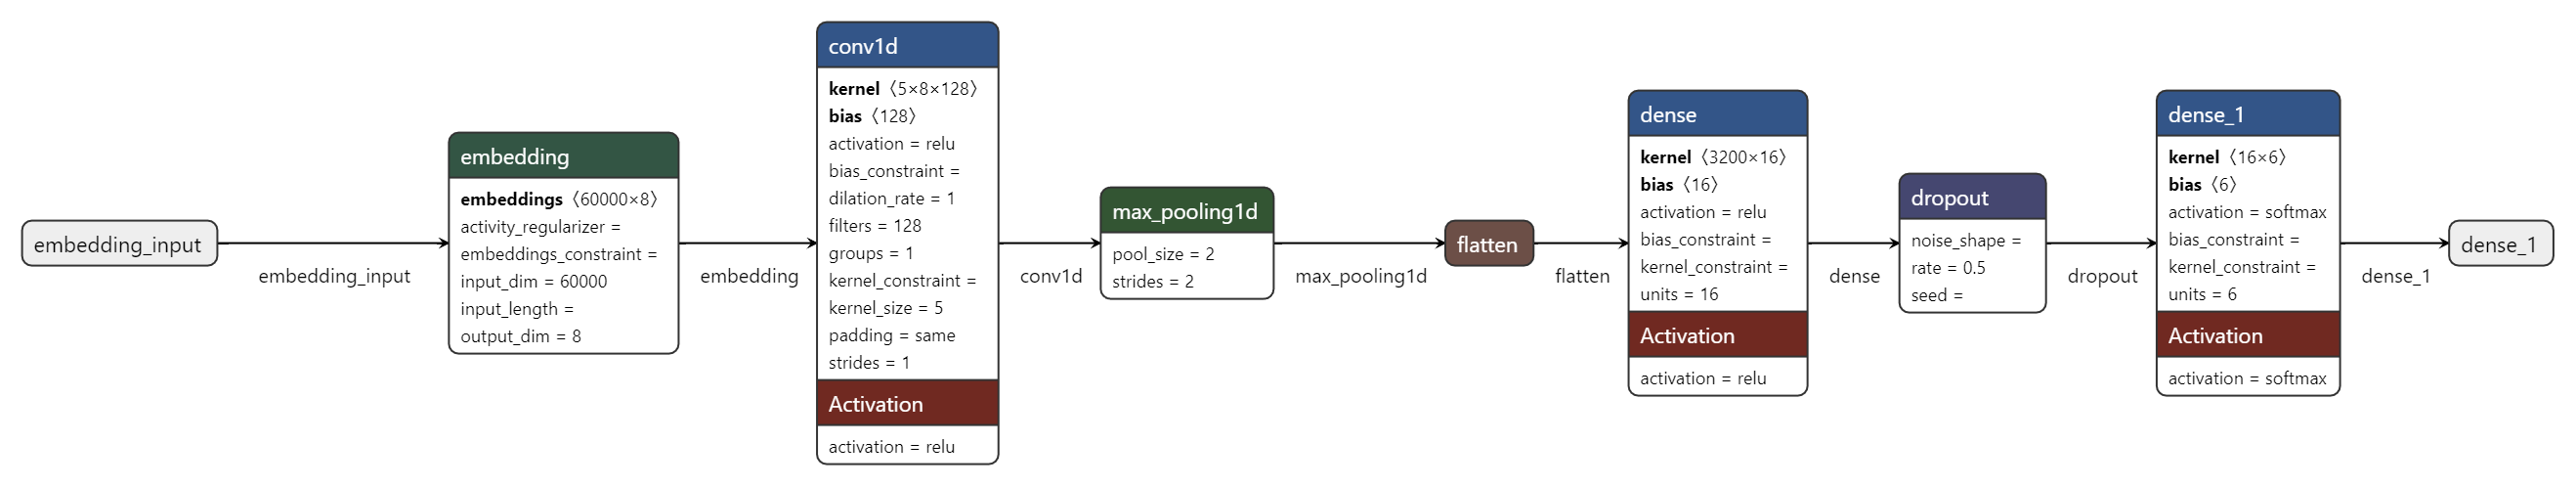

In [24]:
# Looping untuk mendapatkan bobot dari setiap layer
for layer in model.layers:
    # Mengecek apakah layer memiliki bobot
    if layer.weights:
        print("Layer Name:", layer.name)
        # Mendapatkan bobot dan bias dari layer
        weights = layer.get_weights()
        for i, w in enumerate(weights):
            print("Weights Shape (Tensor {}):".format(i), w.shape)
            print("Weights (Tensor {}):".format(i))
            print(w)


Layer Name: embedding
Weights Shape (Tensor 0): (60000, 8)
Weights (Tensor 0):
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-3.384878   -1.1860473  -0.03506846 ... -2.7334657   1.2865374
   2.5950747 ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
Layer Name: conv1d
Weights Shape (Tensor 0): (5, 8, 128)
Weights (Tensor 0):
[[[-0.07083263  0.02439466 -0.00564352 ...  0.07774776  0.0165266
   -0.06683187]
  [-0.0905432  -0.02208409  0.02940479 ...  0.0739006  -0.0615449
    0.07662529]
  [-0.02985196 -0.04287446  0.06716464 ...  0.04335873 -0.01238164
    0.04561806]
  ...
  [-0.00557812 -0.02287479  0.06759989 ... -0.02118073 -0.05764335
   -0.00494755]
  [-0.08658703  0.04327388  0.04552215 ...  0.0801926  -0

## Train Model

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

num_epochs = 150

early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

history = model.fit(
    train_padded, 
    y_train, 
    batch_size=128, 
    epochs=num_epochs, 
    validation_data=(valid_padded, y_valid), 
)

Epoch 1/150
402/402 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.3029 - loss: 1.6857 - val_accuracy: 0.3853 - val_loss: 1.5455
Epoch 2/150
402/402 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3702 - loss: 1.5685 - val_accuracy: 0.4111 - val_loss: 1.4734
Epoch 3/150
402/402 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.3852 - loss: 1.5119 - val_accuracy: 0.4293 - val_loss: 1.4437
Epoch 4/150
402/402 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.4019 - loss: 1.4872 - val_accuracy: 0.4430 - val_loss: 1.4189
Epoch 5/150
402/402 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4104 - loss: 1.4667 - val_accuracy: 0.4444 - val_loss: 1.4024
Epoch 6/150
402/402 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.4163 - loss: 1.4494 - val_accuracy: 0.4451 - val_loss: 1.4020
Epoch 7/150
402/402 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4253 - loss: 1.4352 - val_accuracy: 0.4642 - val_loss: 1.3738
Epoch 8/150
402/402 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4358 - loss: 1.4146 - va

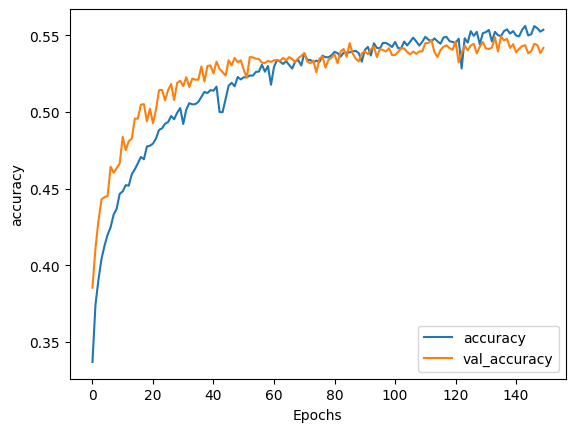

In [26]:
# Plot the training history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")

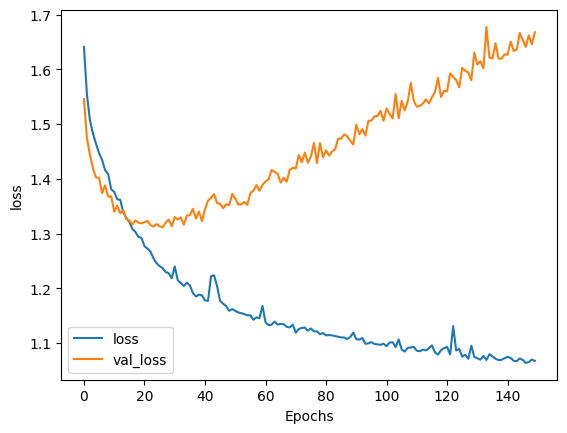

In [27]:
# Plot the training history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "loss")

In [28]:
#sklearn report
from sklearn.metrics import classification_report

loss, accuracy = model.evaluate(valid_padded, y_valid)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

y_pred = model.predict(valid_padded)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_valid, y_pred))

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5372 - loss: 1.7125
Loss:  1.6677913665771484
Accuracy:  0.5417250990867615
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.54      0.49      0.51      1321
           1       0.42      0.70      0.53      1070
           2       0.64      0.67      0.65      1211
           3       0.70      0.41      0.52       536
           4       0.64      0.45      0.53       728
           5       0.53      0.39      0.45       838

    accuracy                           0.54      5704
   macro avg       0.58      0.52      0.53      5704
weighted avg       0.56      0.54      0.54      5704



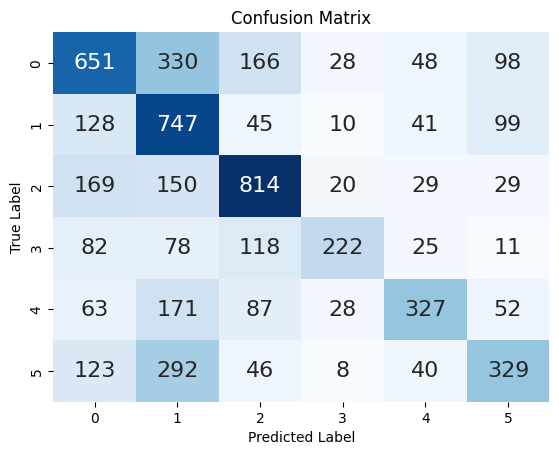

In [29]:
# create a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Membuat confusion matrix
cm = confusion_matrix(y_valid, y_pred)

# Membuat heatmap dari confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [30]:
print(cm)

[[651 330 166  28  48  98]
 [128 747  45  10  41  99]
 [169 150 814  20  29  29]
 [ 82  78 118 222  25  11]
 [ 63 171  87  28 327  52]
 [123 292  46   8  40 329]]


In [31]:
#predict another data input from the model
def predict_emotion(text):
    # Tokenisasi
    text = [text]
    sequences = tokenizer.texts_to_sequences(text)
    padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type, padding="post")
    
    # Prediksi
    pred = model.predict(padded)

    print("Prediksi:", pred)
    pred = np.argmax(pred, axis=1)
    

    # Mengembalikan label emosi
    if pred == 0:
        return "Neutral"
    elif pred == 1:
        return "Anger"
    elif pred == 2:
        return "Joy"
    elif pred == 3:
        return "Love"
    elif pred == 4:
        return "Sad"
    elif pred == 5:
        return "Fear"

#make 10 senteces twitter in predict emotion
predict_emotion("saya sangat senang hari ini")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediksi: [[0.3617345  0.02915021 0.37976077 0.10581218 0.10417665 0.01936565]]


'Joy'

In [32]:
#save model
model.save('./model/model-cnn.h5')

In [33]:
import pickle

with open('tokenizer-emotion(cnn).pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)